## Training Neural Network Model

In this notebook, we will finally train the Neural Network on the file snapshots that we had generated.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# project directory
current_dir = 'Home Credit_Kaggle'

# set the project folder as current working directory
import os
complete_path = os.path.join('/content/drive/My Drive/Colab Notebooks/',current_dir)
os.chdir(complete_path)

# create output folder for model if not already present
out_path_model = os.path.join(complete_path,'models')
if not os.path.isdir(out_path_model):
  os.mkdir(out_path_model)

In [ ]:
import numpy as np
import pandas as pd 
from scipy.sparse import load_npz

In [ ]:
def conv_2D_to_3D(array_2D,input_size):
  # convert a 2D array of size (input_size*rows, cols)
  # to 3D array of size (input_size, rows, cols)
  #print(array_2D.shape)
  rows = int(array_2D.shape[0]//input_size)
  cols = int(array_2D.shape[1])
  # split 2D array into 3D array using loop
  # since reshape() doesn't work on 3D array
  array_3D = [[[]]] # final 3D array
  s_row = 0 # starting row
  e_row = rows # ending row
  for r in range(input_size):
    slice_2D = array_2D[s_row:e_row,:]
    slice_2D = np.expand_dims(slice_2D,axis=0)    
    if r == 0:
      array_3D = slice_2D
    else:
      array_3D = np.append(array_3D,slice_2D,axis=0)
    # on to next set
    s_row = e_row
    e_row += rows
  #=======end of for loop======#

  #print(batch_size, rows, cols)
  return array_3D

##===========end of conv_2D_to_3D function=============##

In [ ]:
def conv_2D_to_3D_2(array_2D,input_size):
  # convert a 2D array of size (input_size*rows, cols)
  # to 3D array of size (input_size, rows, cols)
  #print(array_2D.shape)
  rows = int(array_2D.shape[0]//input_size)
  cols = int(array_2D.shape[1])
  # split 2D array into 3D array using comprehension
  # since reshape() doesn't work on 3D array
  # much much faster than for loop implementation above
  array_3D = np.asarray([array_2D[i*rows:(i+1)*rows,:] for i in range(input_size)])
  return array_3D

In [ ]:
# comparison of time taken for above two functions
input1_categ_values_flat_batch = load_npz(batch_path + "input1_categ_values_csr.npz").todense()
import time
s = time.time()
input1_categ_values_batch = conv_2D_to_3D(input1_categ_values_flat_batch,input_size)
print(time.time() - s)

s = time.time()
input1_categ_values_batch = conv_2D_to_3D_2(input1_categ_values_flat_batch,input_size)
print(time.time() - s)

In [ ]:
# load data of all batches
for i in range(1,8):  
  batch_path = "final_data_nn/batch" + str(i) + "/"

  # load the data for the batch
  input1_numeric_values_batch = np.load(batch_path + "input1_numeric_values.npy")
  input_size = int(input1_numeric_values_batch.shape[0]) 
  
  input1_categ_values_flat_batch = load_npz(batch_path + "input1_categ_values_csr.npz").todense()
  input1_categ_values_batch = conv_2D_to_3D_2(input1_categ_values_flat_batch,input_size)

  target_values_batch = np.load(batch_path + "target_values.npy")

  input2_numeric_values_batch = np.load(batch_path + "input2_numeric_values.npy")
  
  input2_categ_values_flat_batch = load_npz(batch_path + "input2_categ_values_csr.npz").todense()
  input2_categ_values_batch = conv_2D_to_3D_2(input2_categ_values_flat_batch,input_size)

  input3_values_flat_batch = load_npz(batch_path + "input3_values_csr.npz").todense()
  input3_values_batch = conv_2D_to_3D_2(input3_values_flat_batch,input_size)

  input4_numeric_values_batch = np.load(batch_path + "input4_numeric_values.npy")
  
  input4_categ_values_flat_batch = load_npz(batch_path + "input4_categ_values_csr.npz").todense()
  input4_categ_values_batch = conv_2D_to_3D_2(input4_categ_values_flat_batch,input_size)

  input5_values_batch = np.load(batch_path + "input5_values.npy")
  input6_values_batch = np.load(batch_path + "input6_values.npy")

  input7_values_flat_batch = load_npz(batch_path + "input7_values_csr.npz").todense()
  input7_values_batch = conv_2D_to_3D_2(input7_values_flat_batch,input_size)

  if i == 1: # first batch
    input1_numeric_values = input1_numeric_values_batch
    input1_categ_values = input1_categ_values_batch

    target_values = target_values_batch

    input2_numeric_values = input2_numeric_values_batch
    input2_categ_values = input2_categ_values_batch

    input3_values = input3_values_batch

    input4_numeric_values = input4_numeric_values_batch
    input4_categ_values = input4_categ_values_batch

    input5_values = input5_values_batch
    input6_values = input6_values_batch
    input7_values = input7_values_batch

  else:
    # append the batch values
    input1_numeric_values = np.append(input1_numeric_values, input1_numeric_values_batch, axis = 0)
    input1_categ_values = np.append(input1_categ_values, input1_categ_values_batch, axis = 0)

    target_values = np.append(target_values, target_values_batch, axis = 0)

    input2_numeric_values = np.append(input2_numeric_values, input2_numeric_values_batch, axis = 0)
    input2_categ_values = np.append(input2_categ_values, input2_categ_values_batch, axis = 0)

    input3_values = np.append(input3_values, input3_values_batch, axis = 0)

    input4_numeric_values = np.append(input4_numeric_values, input4_numeric_values_batch, axis = 0)
    input4_categ_values = np.append(input4_categ_values, input4_categ_values_batch, axis = 0)

    input5_values = np.append(input5_values, input5_values_batch, axis = 0)
    input6_values = np.append(input6_values, input6_values_batch, axis = 0)
    input7_values = np.append(input7_values, input7_values_batch, axis = 0)
  ##==========end of if else block=================##
  print('Batch ' + str(i) + ' loaded')
##=================end of for loop====================##
input8_values = np.load("final_data/input8_values_scaled.npy")
print('Engineered features loaded')

Batch 1 loaded
Batch 2 loaded
Batch 3 loaded
Batch 4 loaded
Batch 5 loaded
Batch 6 loaded
Batch 7 loaded
Engineered features loaded


In [ ]:
# size check
print(input1_numeric_values.shape)
print(input1_categ_values.shape)
print('='*120)
print(target_values.shape)
print('='*120)
print(input2_numeric_values.shape)
print(input2_categ_values.shape)
print('='*120)
print(input3_values.shape)
print('='*120)
print(input4_numeric_values.shape)
print(input4_categ_values.shape)
print('='*120)
print(input5_values.shape)
print('='*120)
print(input6_values.shape)
print('='*120)
print(input7_values.shape)
print('='*120)
print(input8_values.shape)
print('='*120)

(307511, 27)
(307511, 1, 188)
(307511, 1)
(307511, 3, 10)
(307511, 3, 23)
(307511, 2, 9)
(307511, 2, 4)
(307511, 2, 162)
(307511, 11, 13)
(307511, 6, 6)
(307511, 11, 20)
(307511, 1, 5)


In [ ]:
# checking null values
print(np.isnan(np.sum(input1_numeric_values)))
print(np.isnan(np.sum(input1_categ_values)))
print('='*120)
print(np.isnan(np.sum(target_values)))
print('='*120)
print(np.isnan(np.sum(input2_numeric_values)))
print(np.isnan(np.sum(input2_categ_values)))
print('='*120)
print(np.isnan(np.sum(input3_values)))
print('='*120)
print(np.isnan(np.sum(input4_numeric_values)))
print(np.isnan(np.sum(input4_categ_values)))
print('='*120)
print(np.isnan(np.sum(input5_values)))
print('='*120)
print(np.isnan(np.sum(input6_values)))
print('='*120)
print(np.isnan(np.sum(input7_values)))
print('='*120)
print(np.isnan(np.sum(input8_values)))
print('='*120)

False
False
False
False
False
False
False
False
False
False
False
False


In [ ]:
# split the data into training + validation and test

from sklearn.model_selection import train_test_split

# create a 1D array of indices from 0 to total no of points - 1
ind_data = np.asarray(range(len(target_values))).reshape(-1,)

# split the indices into into training + cv and test
ind_data_tr_cv,ind_data_te,target_values_tr_cv,target_values_te = train_test_split(ind_data,target_values,test_size=0.2,
                                                                              random_state=23,stratify=target_values)

#print(ind_data_tr_cv)
#print(ind_data_te)

# init training + cv data
input1_numeric_values_tr_cv = input1_numeric_values[ind_data_tr_cv,:]
input1_categ_values_tr_cv = input1_categ_values[ind_data_tr_cv,:,:]

input2_numeric_values_tr_cv = input2_numeric_values[ind_data_tr_cv,:,:]
input2_categ_values_tr_cv = input2_categ_values[ind_data_tr_cv,:,:]

input3_values_tr_cv = input3_values[ind_data_tr_cv,:,:]

input4_numeric_values_tr_cv = input4_numeric_values[ind_data_tr_cv,:,:]
input4_categ_values_tr_cv = input4_categ_values[ind_data_tr_cv,:,:]

input5_values_tr_cv = input5_values[ind_data_tr_cv,:,:]
input6_values_tr_cv = input6_values[ind_data_tr_cv,:,:]
input7_values_tr_cv = input7_values[ind_data_tr_cv,:,:]

input8_values_tr_cv = input8_values[ind_data_tr_cv,:,:]

# init testing data
input1_numeric_values_te = input1_numeric_values[ind_data_te,:]
input1_categ_values_te = input1_categ_values[ind_data_te,:,:]

input2_numeric_values_te = input2_numeric_values[ind_data_te,:,:]
input2_categ_values_te = input2_categ_values[ind_data_te,:,:]

input3_values_te = input3_values[ind_data_te,:,:]

input4_numeric_values_te = input4_numeric_values[ind_data_te,:,:]
input4_categ_values_te = input4_categ_values[ind_data_te,:,:]

input5_values_te = input5_values[ind_data_te,:,:]
input6_values_te = input6_values[ind_data_te,:,:]
input7_values_te = input7_values[ind_data_te,:,:]

input8_values_te = input8_values[ind_data_te,:,:]

# size check for training + cv data
print(input1_numeric_values_tr_cv.shape)
print(input1_categ_values_tr_cv.shape)
print('='*120)
print(target_values_tr_cv.shape)
print('='*120)
print(input2_numeric_values_tr_cv.shape)
print(input2_categ_values_tr_cv.shape)
print('='*120)
print(input3_values_tr_cv.shape)
print('='*120)
print(input4_numeric_values_tr_cv.shape)
print(input4_categ_values_tr_cv.shape)
print('='*120)
print(input5_values_tr_cv.shape)
print('='*120)
print(input6_values_tr_cv.shape)
print('='*120)
print(input7_values_tr_cv.shape)
print('='*120)
print(input8_values_tr_cv.shape)
print('='*120)

print('\n')
print('*'*120)
print('\n')

# size check for test data
print(input1_numeric_values_te.shape)
print(input1_categ_values_te.shape)
print('='*120)
print(target_values_te.shape)
print('='*120)
print(input2_numeric_values_te.shape)
print(input2_categ_values_te.shape)
print('='*120)
print(input3_values_te.shape)
print('='*120)
print(input4_numeric_values_te.shape)
print(input4_categ_values_te.shape)
print('='*120)
print(input5_values_te.shape)
print('='*120)
print(input6_values_te.shape)
print('='*120)
print(input7_values_te.shape)
print('='*120)
print(input8_values_te.shape)
print('='*120)

(246008, 27)
(246008, 1, 188)
(246008, 1)
(246008, 3, 10)
(246008, 3, 23)
(246008, 2, 9)
(246008, 2, 4)
(246008, 2, 162)
(246008, 11, 13)
(246008, 6, 6)
(246008, 11, 20)
(246008, 1, 5)


************************************************************************************************************************


(61503, 27)
(61503, 1, 188)
(61503, 1)
(61503, 3, 10)
(61503, 3, 23)
(61503, 2, 9)
(61503, 2, 4)
(61503, 2, 162)
(61503, 11, 13)
(61503, 6, 6)
(61503, 11, 20)
(61503, 1, 5)


In [ ]:
# compute class weights to balance class

from sklearn.utils.class_weight import compute_class_weight

target_values_weight = compute_class_weight(class_weight = 'balanced',
                                            classes=np.unique(target_values_tr_cv.reshape(-1,)),
                                            y=target_values_tr_cv.reshape(-1,))
print(target_values_weight)
target_values_weight_dict = {i:w for i,w in enumerate(target_values_weight)}
print(target_values_weight_dict)

[0.5439093  6.19355488]
{0: 0.5439092983356032, 1: 6.193554884189325}


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Embedding,Conv1D,Concatenate,Reshape,MaxPool1D,AveragePooling1D,Flatten,Dropout,Dense,LSTM
import random as rn

## https://keras.io/getting-started/faq/#how-can-i-obtain-reproducible-results-using-keras-during-development
## Have to clear the session. If you are not clearing, Graph will create again and again and graph size will increses. 
## Varibles will also set to some value from before session
tf.keras.backend.clear_session()

## Set the random seed values to regenerate the model.
np.random.seed(0)
rn.seed(0)

# more enhancements to make result reproducible
# https://stackoverflow.com/questions/55200768/structuring-a-keras-project-to-achieve-reproducible-results-in-gpu/57121117#57121117
import os
os.environ['PYTHONHASHSEED']=str(0)
tf.random.set_seed(0)

# Input Layers

input1_numeric_layer = Input(shape = input1_numeric_values.shape[1])
input1_categ_layer = Input(shape = input1_categ_values.shape[1:])

input2_numeric_layer = Input(shape = input2_numeric_values.shape[1:])
input2_categ_layer = Input(shape = input2_categ_values.shape[1:])

input3_layer = Input(shape = input3_values.shape[1:])

input4_numeric_layer = Input(shape = input4_numeric_values.shape[1:])
input4_categ_layer = Input(shape = input4_categ_values.shape[1:])

input5_layer = Input(shape = input5_values.shape[1:])
input6_layer = Input(shape = input6_values.shape[1:])
input7_layer = Input(shape = input7_values.shape[1:])
input8_layer = Input(shape = input8_values.shape[1:])

# first layer of weights, one for each input layer

dense_inp1_numeric = Dense(units = 2048,activation='relu',
                           kernel_initializer=tf.keras.initializers.he_uniform(seed=13),
                           kernel_regularizer=tf.keras.regularizers.L1L2(l1=0,l2=0))(input1_numeric_layer)
#dense_inp1_numeric = Dropout(rate = 0.25)(dense_inp1_numeric)

#embed_inp1_categ = Embedding(input_dim=int(input1_categ_values.shape[1]),1,input_length=int(input1_categ_values.shape[1]),
#embeddings_initializer=tf.keras.initializers.he_uniform(seed=12))(input1_categ_layer)

cnn_inp1_categ = Conv1D(filters = 256, kernel_size = 15, strides = 15, data_format = 'channels_first',activation='relu',
#cnn_inp1_categ = Conv1D(filters = 1024, kernel_size = input1_categ_values.shape[1],activation='relu',                        
                        kernel_initializer=tf.keras.initializers.glorot_uniform(seed=14))(input1_categ_layer)
#cnn_inp1_categ = Dropout(rate = 0.25)(cnn_inp1_categ)

cnn_inp2_numeric = Conv1D(filters = 64, kernel_size = input2_numeric_values.shape[1],activation='relu',
#cnn_inp2_numeric = Conv1D(filters = 64, kernel_size = 2, strides = 2,data_format='channels_first',
                          kernel_initializer=tf.keras.initializers.glorot_uniform(seed=7))(input2_numeric_layer)

#cnn_inp2_categ = Conv1D(filters = 128, kernel_size = input2_categ_values.shape[1]//2, strides = input2_categ_values.shape[1]//2, activation='sigmoid',
cnn_inp2_categ = Conv1D(filters = 128, kernel_size = 3, strides = 3, data_format='channels_first',activation='relu',
                        kernel_initializer=tf.keras.initializers.glorot_uniform(seed=11))(input2_categ_layer)

cnn_inp3 = Conv1D(filters = 8, kernel_size = 5, strides = 1, data_format='channels_first',
                  kernel_initializer=tf.keras.initializers.glorot_uniform(seed=9))(input3_layer)

cnn_inp4_numeric = Conv1D(filters = 16, kernel_size = input4_categ_values.shape[1],activation='relu',
#cnn_inp4_numeric = Conv1D(filters = 16, kernel_size = 4,data_format='channels_first',
                          kernel_initializer=tf.keras.initializers.glorot_uniform(seed=1))(input4_numeric_layer)
cnn_inp4_categ = Conv1D(filters = 32, kernel_size = 20, strides = 20, data_format='channels_first',activation='relu',
                        kernel_initializer=tf.keras.initializers.glorot_uniform(seed=17))(input4_categ_layer)

cnn_inp5 = Conv1D(filters = 1024, kernel_size = input5_values.shape[1],activation='relu',
#cnn_inp5 = Conv1D(filters = 16, kernel_size = 4,data_format='channels_first',                  
                          kernel_initializer=tf.keras.initializers.glorot_uniform(seed=8))(input5_layer)
cnn_inp6 = Conv1D(filters = 32, kernel_size = input6_values.shape[1],activation='relu',
#cnn_inp6 = Conv1D(filters = 16, kernel_size = 2,data_format='channels_first',
                          kernel_initializer=tf.keras.initializers.glorot_uniform(seed=15))(input6_layer)
cnn_inp7 = Conv1D(filters = 512, kernel_size = input7_values.shape[1],activation='relu',
#cnn_inp7 = Conv1D(filters = 1024, kernel_size = 4, strides = 4,data_format='channels_first',
                          kernel_initializer=tf.keras.initializers.glorot_uniform(seed=21))(input7_layer)

dense_inp8 = Dense(units = 2048,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(seed=7))(input8_layer)                          

# second layer to flatten the outputs

flat_inp1_categ = Flatten()(cnn_inp1_categ)

flat_inp2_numeric = Flatten()(cnn_inp2_numeric)
flat_inp2_categ = Flatten()(cnn_inp2_categ)

flat_inp3 = Flatten()(cnn_inp3)

flat_inp4_numeric = Flatten()(cnn_inp4_numeric)
flat_inp4_categ = Flatten()(cnn_inp4_categ)

flat_inp5 = Flatten()(cnn_inp5)
flat_inp6 = Flatten()(cnn_inp6)
flat_inp7 = Flatten()(cnn_inp7)

flat_inp8 = Flatten()(dense_inp8)

# third layer to concatenate the above outputs

concat_layer = Concatenate()([dense_inp1_numeric,flat_inp1_categ,flat_inp2_numeric,flat_inp2_categ,
                        flat_inp3,flat_inp4_numeric,flat_inp4_categ,
                        flat_inp5,flat_inp6,flat_inp7,flat_inp8])

#concat_layer = Reshape(target_shape=(-1,1))(concat_layer)
#concat_layer = AveragePooling1D(pool_size=2,strides=2)(concat_layer)
#concat_layer = Flatten()(concat_layer)

# dense layers to process above outputs

dense_layer_1 = Dense(units = 8,activation='relu',kernel_initializer=tf.keras.initializers.he_uniform(seed=3))(concat_layer)

#dropout_1 = Dropout(rate=0.0,seed=19)(dense_layer_1)

#dense_layer_2 = Dense(units = 8,activation='sigmoid',kernel_initializer=tf.keras.initializers.he_uniform(seed=3))(dropout_1)

# output layer

output_layer = Dense(units = 1,activation='sigmoid',kernel_initializer=tf.keras.initializers.he_uniform(seed=5))(dense_layer_1)

# model

model = Model([input1_numeric_layer,input1_categ_layer,input2_numeric_layer,input2_categ_layer,
               input3_layer,input4_numeric_layer,input4_categ_layer,
               input5_layer,input6_layer,input7_layer,input8_layer],output_layer)

#optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

#AUC metrics object
tf_auc = tf.keras.metrics.AUC(name='auc')

#compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=[tf_auc])
              #run_eagerly = True)

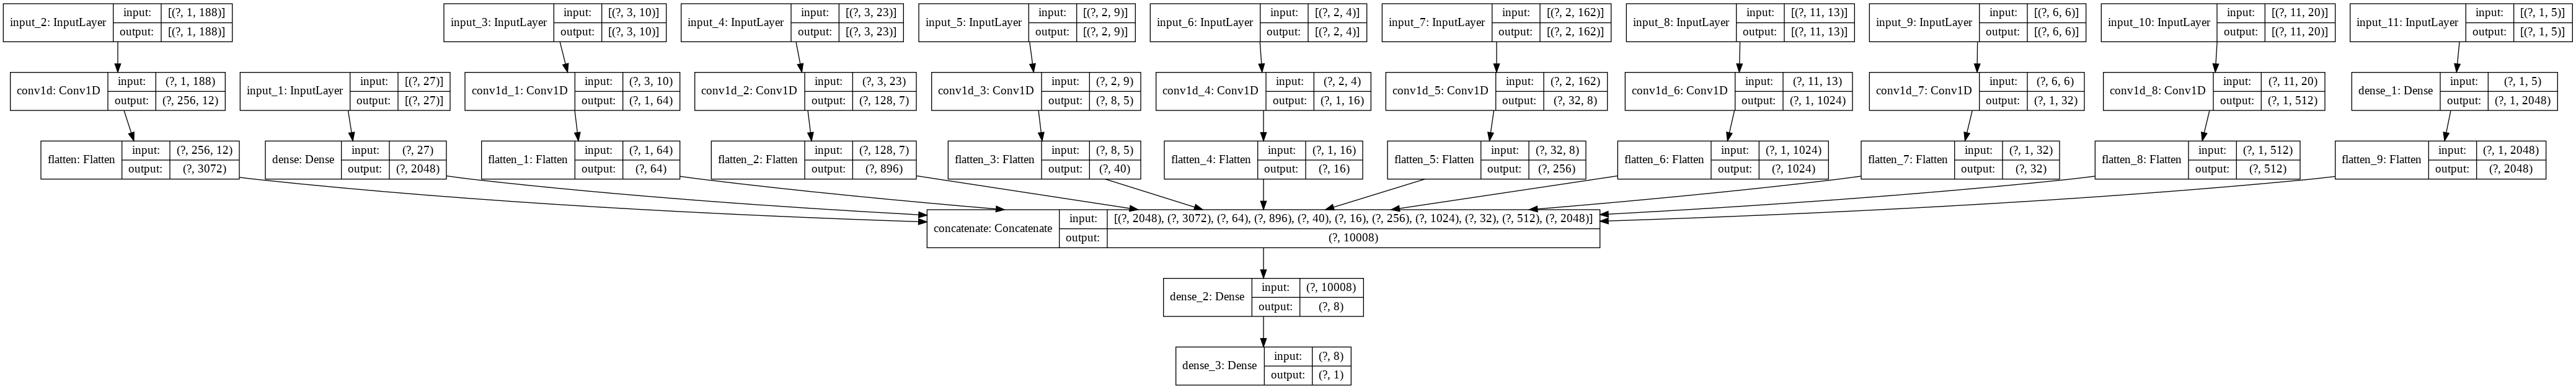

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True,rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1, 188)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 3, 10)]      0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 3, 23)]      0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 2, 9)]       0                                            
_______________________________________________________________________________________

In [ ]:
#if old weights are required to be loaded
model.load_weights("models/model_checkpoint.h5")

In [ ]:
# callback to run garbage collector after every batch

import gc

class Garbage_Collect_Callback(tf.keras.callbacks.Callback):
  def on_train_batch_end(self, batch, logs=None):
    gc.collect()

  def on_epoch_end(self, epoch, logs=None):
    gc.collect()

#==========end of Garbage_Collect_Callback class===========#

gc_cb = Garbage_Collect_Callback()

from tensorflow.keras.callbacks import LearningRateScheduler

def lr_schedule(epoch,lr):
  if (epoch % 1 == 0 and epoch != 0):
    print('\nLearning rate decreased by 10% after epoch ',epoch)    
    return(lr*0.9)
  else:
    return(lr)
##=============end of lr_schedule function==========##

cb_LearningRate = tf.keras.callbacks.LearningRateScheduler(lr_schedule) #callback to schedule learning rate

gc.collect()

model.fit([input1_numeric_values_tr_cv,input1_categ_values_tr_cv,
          input2_numeric_values_tr_cv,input2_categ_values_tr_cv,input3_values_tr_cv,
          input4_numeric_values_tr_cv,input4_categ_values_tr_cv,input5_values_tr_cv,
          input6_values_tr_cv,input7_values_tr_cv,input8_values_tr_cv],
          target_values_tr_cv,epochs = 17,
          validation_split = 0.20,
          batch_size = 128,class_weight = target_values_weight_dict,
          callbacks=[gc_cb,cb_LearningRate])
          #callbacks=[gc_cb,tensorboard_callback])

Epoch 1/17
1538/1538 [==============================] - 128s 83ms/step - loss: 0.6006 - auc: 0.7410 - val_loss: 0.6617 - val_auc: 0.7609

Learning rate decreased by 10% after epoch  1
Epoch 2/17
1538/1538 [==============================] - 128s 83ms/step - loss: 0.5871 - auc: 0.7566 - val_loss: 0.5555 - val_auc: 0.7648

Learning rate decreased by 10% after epoch  2
Epoch 3/17
1538/1538 [==============================] - 128s 83ms/step - loss: 0.5829 - auc: 0.7610 - val_loss: 0.6450 - val_auc: 0.7660

Learning rate decreased by 10% after epoch  3
Epoch 4/17
1538/1538 [==============================] - 129s 84ms/step - loss: 0.5797 - auc: 0.7643 - val_loss: 0.5549 - val_auc: 0.7663

Learning rate decreased by 10% after epoch  4
Epoch 5/17
1538/1538 [==============================] - 135s 88ms/step - loss: 0.5772 - auc: 0.7668 - val_loss: 0.5503 - val_auc: 0.7664

Learning rate decreased by 10% after epoch  5
Epoch 6/17
1538/1538 [==============================] - 133s 87ms/step - loss: 0

###Function to plot confustion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divide each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    #labels = [1,2,3,4,5,6,7,8,9]
    labels = [0,1]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(4,3))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(4,3))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(4,3))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))


Train Data Confusion Matrix + Precision Matrix + Recall Matrix
Number of misclassified points  27.77348704107184
-------------------------------------------------- Confusion matrix --------------------------------------------------


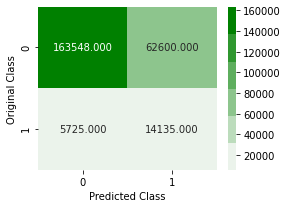

-------------------------------------------------- Precision matrix --------------------------------------------------


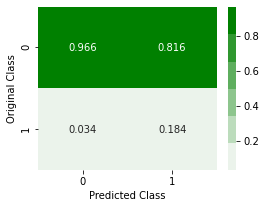

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


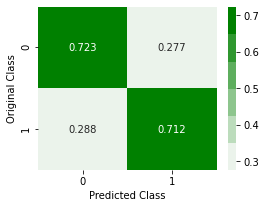

Sum of rows in precision matrix [1. 1.]
Train Data AUC score:  0.7898230787684227
************************************************************************************************************************

Test Data Confusion Matrix + Precision Matrix + Recall Matrix
Number of misclassified points  28.8880217225176
-------------------------------------------------- Confusion matrix --------------------------------------------------


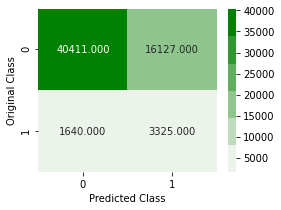

-------------------------------------------------- Precision matrix --------------------------------------------------


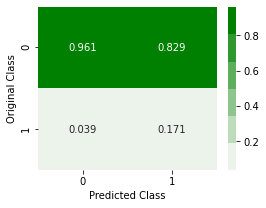

Sum of columns in precision matrix [1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


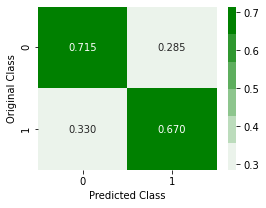

Sum of rows in precision matrix [1. 1.]
Test Data AUC score:  0.7546955684022121


In [ ]:
# predict with best model

# predicted probabilities for training + cv data
target_values_tr_cv_proba = model.predict([input1_numeric_values_tr_cv,
                                           input1_categ_values_tr_cv,
                                           input2_numeric_values_tr_cv,
                                           input2_categ_values_tr_cv,
                                           input3_values_tr_cv,
                                           input4_numeric_values_tr_cv,
                                           input4_categ_values_tr_cv,
                                           input5_values_tr_cv,
                                           input6_values_tr_cv,
                                           input7_values_tr_cv,
                                           input8_values_tr_cv]).reshape(-1,)
#print(target_values_tr_cv_proba)

# predicted probabilities for test data          
target_values_te_proba = model.predict([input1_numeric_values_te,
                                        input1_categ_values_te,
                                        input2_numeric_values_te,
                                        input2_categ_values_te,
                                        input3_values_te,
                                        input4_numeric_values_te,
                                        input4_categ_values_te,
                                        input5_values_te,
                                        input6_values_te,
                                        input7_values_te,
                                        input8_values_te]).reshape(-1,)

# predicted class labels
target_values_tr_cv_predict = np.asarray([int(y_prob > 0.5) for y_prob in target_values_tr_cv_proba])
target_values_te_predict = np.asarray([int(y_prob > 0.5) for y_prob in target_values_te_proba])

# calculate AUC score for train and test data
from sklearn.metrics import roc_auc_score
train_auc = roc_auc_score(target_values_tr_cv,target_values_tr_cv_proba)
test_auc = roc_auc_score(target_values_te,target_values_te_proba)

# print auc score and confusion matrix
print('\nTrain Data Confusion Matrix + Precision Matrix + Recall Matrix')
print('='*120)
plot_confusion_matrix(target_values_tr_cv, target_values_tr_cv_predict)
print('Train Data AUC score: ',train_auc)

print('*'*120)

print('\nTest Data Confusion Matrix + Precision Matrix + Recall Matrix')
print('='*120)
plot_confusion_matrix(target_values_te, target_values_te_predict)
print('Test Data AUC score: ',test_auc)

In [ ]:
# Test the model
score = model.evaluate([input1_numeric_values,input1_categ_values,
          input2_numeric_values,input2_categ_values,input3_values,
          input4_numeric_values,input4_categ_values,input5_values,
          input6_values,input7_values],
          target_values, verbose=1)
print('Train loss:', score[0])
print('Train AUC:', score[1])

In [ ]:
# Save the trained weights in to .h5 format
model.save_weights("models/model_checkpoint.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# save the complete model through tf.saved_model
# since simple pickle does not work for tf models
savemodel_path = 'models/nn_model'
model.save(savemodel_path)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/nn_model/assets


In [ ]:
# load model if required
savemodel_path = 'models/nn_model'
model = tf.keras.models.load_model(savemodel_path)